In [18]:
# Import Libraries

import tensorflow as tf
from tensorflow import keras
import numpy as np


In [19]:
# Load Dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()


In [20]:
# Preprocess and Prepare the Dataset

# Scale pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot
num_classes = 10
y_train_ohe = tf.one_hot(y_train, depth=num_classes)
y_test_ohe = tf.one_hot(y_test, depth=num_classes)


In [21]:
# Create tf.data Datasets

batch_size = 64

def make_dataset(x, y):
    ds = tf.data.Dataset.from_tensor_slices((x, y))
    ds = ds.shuffle(buffer_size=10000).batch(batch_size)
    return ds

train_ds = make_dataset(x_train, y_train_ohe)
test_ds = make_dataset(x_test, y_test_ohe)


In [22]:
# Build the Model

My_model = keras.Sequential([
    keras.layers.Reshape(target_shape=(28 * 28,), input_shape=(28, 28)),
    keras.layers.Dense(units=256, activation='relu'),
    keras.layers.Dense(units=192, activation='relu'),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dense(units=10, activation='softmax')
])

C:\Users\Aziz\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
# Compile & Train

model.compile(
    optimizer='adam',
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=['accuracy']
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)


Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9168 - loss: 0.2180 - val_accuracy: 0.8876 - val_loss: 0.3290
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9240 - loss: 0.1998 - val_accuracy: 0.8870 - val_loss: 0.3513
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9233 - loss: 0.2003 - val_accuracy: 0.8872 - val_loss: 0.3579
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.9230 - loss: 0.1968 - val_accuracy: 0.8898 - val_loss: 0.3440
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9285 - loss: 0.1861 - val_accuracy: 0.8785 - val_loss: 0.3661
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9304 - loss: 0.1793 - val_accuracy: 0.8902 - val_loss: 0.3548
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9342 - loss: 0.1756 - val_accuracy: 0.8884 - val_loss: 0.3717
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9368 - loss: 0.1658 - val_accuracy: 0.

In [24]:
# Evaluate & Predict

test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc:.4f}")

predictions = model.predict(test_ds)
predicted_labels = np.argmax(predictions, axis=1)


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8938 - loss: 0.3847
Test accuracy: 0.8915
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


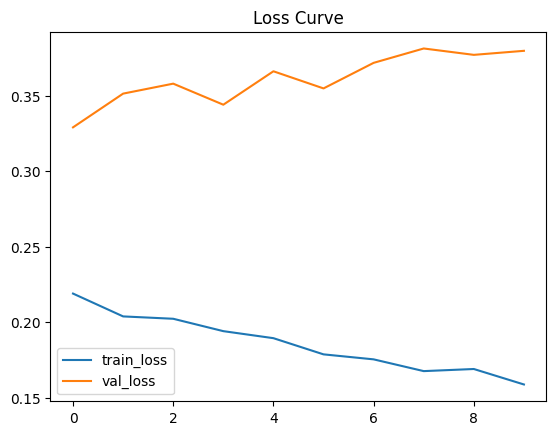

In [25]:
# Visualize Training Curves

import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.title("Loss Curve")
plt.show()
